# Bank Cross Sales 
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Mentioned pre-requisite questions before finding code

What is correlation?
What is correlation coefficient?

In [1]:
# Step 1 - Read the data with th help
    

In [2]:
import pandas as pd

In [3]:
bank = pd.read_csv("data/bank_cross_sale.csv")

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Attribute Information:

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last 

of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



Here y is prediction weather client has subscribed to deposit or not?

In [7]:
bank.y

0         no
1         no
2         no
3         no
4         no
5         no
6         no
7         no
8         no
9         no
10        no
11        no
12        no
13        no
14        no
15        no
16        no
17        no
18        no
19        no
20        no
21        no
22        no
23        no
24        no
25        no
26        no
27        no
28        no
29        no
        ... 
41158    yes
41159    yes
41160    yes
41161     no
41162     no
41163    yes
41164    yes
41165    yes
41166    yes
41167     no
41168     no
41169     no
41170     no
41171    yes
41172    yes
41173    yes
41174    yes
41175     no
41176     no
41177     no
41178    yes
41179     no
41180     no
41181    yes
41182     no
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, dtype: object

Ways to convert categorical to numeric
1. if
2. getdummies
3. astype
4. mapreduce

We are creating outcome column in bank to book keep

In [8]:
bank['outcome'] = bank.y.map({'no':0, 'yes':1})

In [9]:
import matplotlib
%matplotlib inline

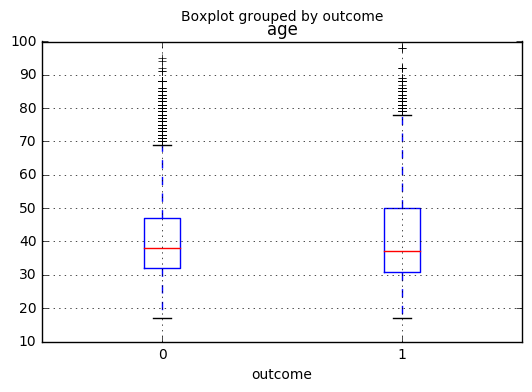

In [10]:
bank.boxplot(column='age', by='outcome')

In [11]:
#Same plot by bokeh -
from bokeh.charts import BoxPlot, output_file, show

title = "Age box plot"
box_plot = BoxPlot(bank, label=['outcome'], values='age', color='outcome', title=title)
show(box_plot)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DF982E8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DFE0390>], dtype=object)

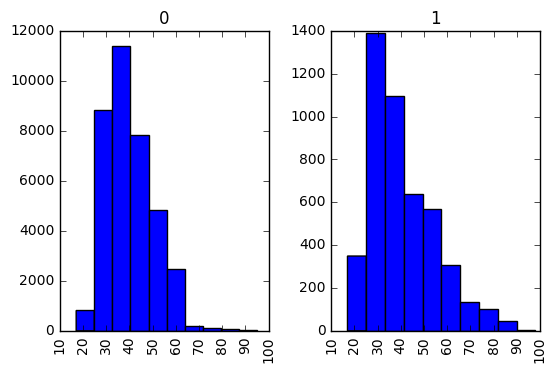

In [12]:
import matplotlib.pyplot as plt
bank.hist('age', by='outcome')

In [13]:
#Next variable Job
#Taking outcome's mean according to job category

bank.groupby('job').outcome.mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: outcome, dtype: float64

Now treat each job type as independent variable, which will lead to add additional column to data like job admin and all types next one 

bcoz each profession will have corresponding investments in bank
# Let's create job admin independent variable first

In [14]:
job_dummies = pd.get_dummies(bank.job, prefix = 'job')
job_dummies

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
job_dummies.drop(job_dummies.columns[0], axis =1, inplace=True)
job_dummies

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
job_dummies.dtypes

job_blue-collar      float64
job_entrepreneur     float64
job_housemaid        float64
job_management       float64
job_retired          float64
job_self-employed    float64
job_services         float64
job_student          float64
job_technician       float64
job_unemployed       float64
job_unknown          float64
dtype: object

In [17]:
# Next column is default

bank.groupby('default').outcome.mean()

default
no         0.12879
unknown    0.05153
yes        0.00000
Name: outcome, dtype: float64

In [18]:
bank.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

This shows most of the times people have not defaulted after looking at excel found out only 3 have (value = yes) defaulted

So now we will convert unknown and yes  to 1 and no to 0, so that it can become useful feature

In [19]:
bank['default'] = bank.default.map({'no':0, 'yes':1, 'unknown' :1})
bank.default.value_counts()

0    32588
1     8600
Name: default, dtype: int64

In [20]:
# Next column to look is contact
bank.groupby('contact').outcome.mean()

contact
cellular     0.147376
telephone    0.052313
Name: outcome, dtype: float64

In [21]:
bank['contact'] = bank.contact.map({'cellular':0, 'telephone':1})
bank.contact.value_counts()

0    26144
1    15044
Name: contact, dtype: int64

In [22]:
# Next column to look is month
# possible it could be important variable
bank.groupby('month').outcome.mean()

month
apr    0.204787
aug    0.106021
dec    0.489011
jul    0.090466
jun    0.105115
mar    0.505495
may    0.064347
nov    0.101439
oct    0.438719
sep    0.449123
Name: outcome, dtype: float64

In [23]:
bank.groupby('month').outcome.agg(['count','mean']).sort('count')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,count,mean
month,,
dec,182,0.489011
mar,546,0.505495
sep,570,0.449123
oct,718,0.438719
apr,2632,0.204787
nov,4101,0.101439
jun,5318,0.105115
aug,6178,0.106021
jul,7174,0.090466


here if count of customers increases then mean as in chances of y to be 1 reduces,
we may iinfer this as if you increase number of calls then also customer conversion is low

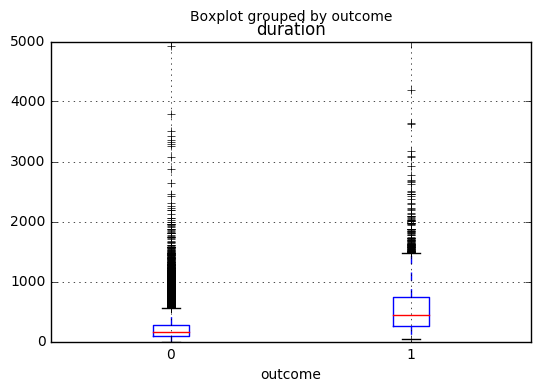

In [24]:
# next variable is duration of call
bank.boxplot(column='duration' ,by='outcome')

Above plolt says's when call duration is long then product is bought, but in o's box plot duraion is small and product is not bounght

In [25]:
bank.groupby('previous').outcome.mean()

previous
0    0.088322
1    0.212015
2    0.464191
3    0.592593
4    0.542857
5    0.722222
6    0.600000
7    0.000000
Name: outcome, dtype: float64

In [26]:
# poutcome

bank.groupby('poutcome').outcome.mean()

poutcome
failure        0.142286
nonexistent    0.088322
success        0.651129
Name: outcome, dtype: float64

In [27]:
#We can use dummies in above case create dummies for poutcome

poutcome_dummies = pd.get_dummies(bank.poutcome, prefix= 'poutcome')
poutcome_dummies.drop(poutcome_dummies.columns[0], axis = 1, inplace=True)

In [28]:
poutcome_dummies.head()

,poutcome_nonexistent,poutcome_success
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


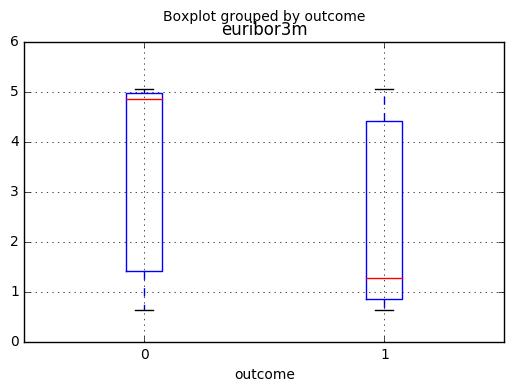

In [29]:
# Euribor3m
bank.boxplot(column='euribor3m', by ='outcome')

Distribution is skewed in opposite direction for yes and no
plot histogram for this values. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D848C50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DC98278>], dtype=object)

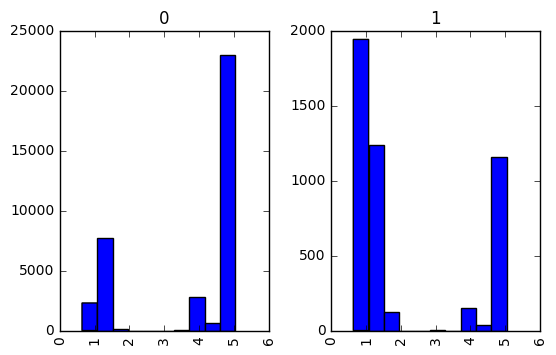

In [30]:
bank.hist(column = 'euribor3m', by='outcome')

# Feature Engineering

In [31]:
# All all dummie variables to bank dataset
bank = pd.concat([bank, job_dummies, poutcome_dummies], axis=1)
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'outcome',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [32]:
len(bank.columns)

35

In [33]:
feature_cols = ['default', 'contact', 'previous', 'euribor3m'] + list(bank.columns[-13:])

#adding all columns after day_of the week

In [34]:
feature_cols = list(set(feature_cols))
print(len(feature_cols))
feature_cols

17


['euribor3m',
 'poutcome_success',
 'default',
 'job_retired',
 'job_student',
 'poutcome_nonexistent',
 'job_self-employed',
 'job_housemaid',
 'contact',
 'job_blue-collar',
 'job_management',
 'job_services',
 'job_technician',
 'job_unemployed',
 'previous',
 'job_entrepreneur',
 'job_unknown']

In [35]:
# x is set of independent variable
X = bank[feature_cols]

# y is dependent variable
y = bank.outcome


# Model building

Use logistic
Use cross validation to evaluate the AUC of logistic regression model with chosen features
Try to increase AUC by selecting differnt sets of features

In [36]:
#calculate cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
?LogisticRegression

In [38]:
?GridSearchCV

Object `GridSearchCV` not found.


In [39]:
logreg = LogisticRegression(C=1e10)
model = logreg.fit(X,y)
model

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [40]:
model.coef_

array([[-0.42231125,  2.03417277, -0.37574289,  0.48542266,  0.40175274,
         0.79932103, -0.082074  , -0.04973628, -0.33107527, -0.43788138,
        -0.09186463, -0.33989596, -0.0633578 ,  0.0353546 ,  0.31307573,
        -0.22795218, -0.00847862]])

In [41]:
# internall cross val divides data in train and test set and test result on test set
model_scores = cross_val_score(logreg, X,y, cv=10, scoring='roc_auc')

# here cv represents - k in kfold cross validation

In [42]:
model_scores

array([ 0.49210016,  0.36390219,  0.75320711,  0.99917685,  0.97623532,
        0.99621739,  0.99489481,  0.89916329,  0.90142239,  0.76943518])

In [43]:
print("Accuracy: %0.2f (+/- %0.2f)" %(model_scores.mean(), model_scores.std())) 

Accuracy: 0.81 (+/- 0.21)


In [44]:
from sklearn.cross_validation import cross_val_predict

In [45]:
predicted = cross_val_predict(logreg, X, y , cv =10)
predicted

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
from sklearn import metrics
print('Accuracy = ' , metrics.accuracy_score(list(y), list(predicted)))

Accuracy =  0.884650869185


In [47]:
temp = pd.DataFrame(predicted, columns=['Predicted'])
matrix = temp.Predicted.map({0:'no', 1:'yes'})

In [48]:
from sklearn.metrics import confusion_matrix
labels = ['no', 'yes']
cm = confusion_matrix(bank.y, matrix, labels)
print(cm)

[[35513  1035]
 [ 3716   924]]


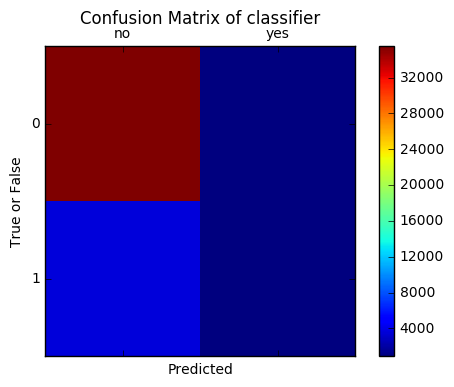

In [49]:
#Plot confusion matrix

import pylab as pl
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
pl.title('Confusion Matrix of classifier')
fig.colorbar(cax)
ax.set_xticklabels(['']+ labels)
ax.set_xticklabels(['']+labels )
pl.xlabel('Predicted')
pl.ylabel('True or False')

pl.show()

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# why random_state = 0

In [61]:
from sklearn.metrics import classification_report
import sklearn as sl



In [62]:
Version = sl.__version__
Version

'0.18'

In [64]:
if Version < '0.18':
    from sklearn.grid_search import GridSearchCV
else :
    from sklearn.model_selection import GridSearchCV
    
    
tuned_parameters = [{'C': [1, 10, 100, 1000, 10000, 100000]}]
scores = ['precision', 'recall']

#precision - In confusion matrix ((TP)/ (TP+FP))
#recall - ((TP)/ (TP+FN))

#set the parameters by cross-validation

for score in scores:
    print("#Tuning hyperparameters for %s"% score)
    print()
   
    clf = GridSearchCV(logreg,tuned_parameters,cv=5,scoring= "%s_macro" % score)
    clf.fit(X_train,y_train)
   
    print("Best parameter found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds= clf.cv_results_['std_test_score']
    for mean,std,params in zip(means ,stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean,std * 2, params))
    print()
    print ("Detailed Classification report:")
    print("The model is trained on full developement set")
    print("The scores are computed on the full evalution set")
    print()
    y_true,y_pred= y_test, clf.predict(X_test)
    print(classification_report(y_true,y_pred))
    print()

#Tuning hyperparameters for precision

Best parameter found on development set:

{'C': 1}

Grid scores on development set

0.796 (+/-0.025) for {'C': 1}
0.796 (+/-0.025) for {'C': 10}
0.796 (+/-0.025) for {'C': 100}
0.796 (+/-0.025) for {'C': 1000}
0.796 (+/-0.025) for {'C': 10000}
0.796 (+/-0.025) for {'C': 100000}

Detailed Classification report:
The model is trained on full developement set
The scores are computed on the full evalution set

             precision    recall  f1-score   support

          0       0.91      0.99      0.95      7319
          1       0.67      0.18      0.29       919

avg / total       0.88      0.90      0.87      8238


#Tuning hyperparameters for recall

Best parameter found on development set:

{'C': 1}

Grid scores on development set

0.588 (+/-0.008) for {'C': 1}
0.588 (+/-0.008) for {'C': 10}
0.588 (+/-0.008) for {'C': 100}
0.588 (+/-0.008) for {'C': 1000}
0.588 (+/-0.008) for {'C': 10000}
0.588 (+/-0.008) for {'C': 100000}

Detailed Classificat

In [72]:
# select the best model
#clf.best_estimator
model = clf.best_estimator_
model.fit(X_train,y_train)
print("test accuracy: %0.3f"% model.score(X_test,y_test))

test accuracy: 0.899


# Support Vector Machine model

In [68]:
from sklearn import svm

svc = svm.SVC(kernel='linear')
model2_cv = cross_val_score(svc, X, y, cv=5, scoring= 'roc_auc')


In [69]:
print("Accuracy: %0.2f (+/- %0.2f)" %(model2_cv.mean(), model2_cv.std()))

Accuracy: 0.83 (+/- 0.10)


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

#Design parameters
#? Full factorial design

In [87]:
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)    

#set parameters by cross-validation
# This is not only methodology
# here we are setting kernal as rbf, it could be some time linear as well
tuned_parameters = [{'kernal' : ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1,10,100,1000]},
                   {'kernal': ['linear'], 'C': [1,10,100,1000]}]
scores = ['precision', 'recall']

    for score in scores:
        print("#Tuning hyperparameters for %s" % score)
        print()

        clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5, scoring="%s_macro" % score)
        clf.fit(X_train,y_train)

        print("Best parameter found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set")
        print()
        means = clf.cv_results_["mean_test_score"]
        stds= clf.cv_results_['std_test_score']
        for mean,std,params in zip(means ,stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r" % (mean,std * 2, params))
        print()
        print ("Detailed Classification report:")
        print("The model is trained on full developement set")
        print("The scores are computed on the full evalution set")
        print()
        y_true,y_pred= y_test, clf.predict(X_test)
        print(classification_report(y_true,y_pred))
        print()

#Tuning hyperparameters for precision



ValueError: Invalid parameter kernal for estimator SVC. Check the list of available parameters with `estimator.get_params().keys()`.